# Module 4: Exercise A

In [28]:
import pandas as pd
import numpy as np

Let's import and explore the data file "hc_train.csv":

In [29]:
hc = pd.read_csv('./raw/hc_train.csv')
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51238 entries, 0 to 51237
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         51238 non-null  int64  
 1   case_id                            51238 non-null  int64  
 2   Hospital_code                      51238 non-null  int64  
 3   Hospital_type_code                 51238 non-null  object 
 4   City_Code_Hospital                 51238 non-null  int64  
 5   Hospital_region_code               51238 non-null  object 
 6   Available Extra Rooms in Hospital  51238 non-null  int64  
 7   Department                         51238 non-null  object 
 8   Ward_Type                          51238 non-null  object 
 9   Ward_Facility_Code                 51238 non-null  object 
 10  Bed Grade                          51214 non-null  float64
 11  patientid                          51238 non-null  int

In [30]:
hc.shape

(51238, 19)

In [31]:
hc.isna().sum()

Unnamed: 0                             0
case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                             24
patientid                              0
City_Code_Patient                    750
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   0
dtype: int64

## A Closer Look into Data

Before starting our analysis, it is important to know the data columns and the actual content. We can print the first 5 rows with `.head()` method:

In [32]:
hc.head()

,Unnamed: 0,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,119967,119968,27,a,7,Y,3,gynecology,R,C,2.0,11389,8.0,Emergency,Minor,2,11-20,5072.0,21-30
1,92433,92434,6,a,6,X,4,gynecology,Q,F,1.0,12522,2.0,Emergency,Extreme,4,31-40,3585.0,21-30
2,132258,132259,16,c,3,Z,4,gynecology,S,A,3.0,119556,8.0,Trauma,Moderate,6,71-80,4013.0,More than 100 Days
3,168439,168440,23,a,6,X,2,anesthesia,S,F,3.0,107177,8.0,Urgent,Extreme,2,71-80,5160.0,21-30
4,82100,82101,25,e,1,X,3,gynecology,R,E,3.0,64508,13.0,Trauma,Moderate,3,61-70,4099.0,21-30


In [33]:
hc['Hospital_code'].unique().shape

(32,)

In [34]:
hc['Hospital_region_code'].unique().shape

(3,)

There are 32 hospitals in 3 different regions in the data set.

In [35]:
hc['Department'].value_counts()

Department
gynecology            40051
anesthesia             4858
radiotherapy           4589
TB & Chest disease     1554
surgery                 186
Name: count, dtype: int64

Most patients are treated in the gynecology department, and 186 patients went under surgery.

In [36]:
hc['Age'].value_counts().sort_index()

Age
0-10        993
11-20      2783
21-30      6664
31-40     10300
41-50     10067
51-60      7861
61-70      5357
71-80      5730
81-90      1269
91-100      214
Name: count, dtype: int64

Majority of the patients are adults in their 30s and 40s, and roughly around 1500 whose age is >80.

In [37]:
hc['Type of Admission'].value_counts()

Type of Admission
Trauma       24614
Emergency    18889
Urgent        7735
Name: count, dtype: int64

Half of the patients have trauma related issues. There are 7735 urgent issues recorded.

In [38]:
hc['Severity of Illness'].value_counts()

Severity of Illness
Moderate    28248
Minor       13844
Extreme      9146
Name: count, dtype: int64

Severity was mostly moderate.

When a categorical column has too many values, it is difficult to tell the distribution using `value_counts()`. Instead, histograms provide effective visualization. Pandas has a method built in to easily generate histograms.

<Axes: >

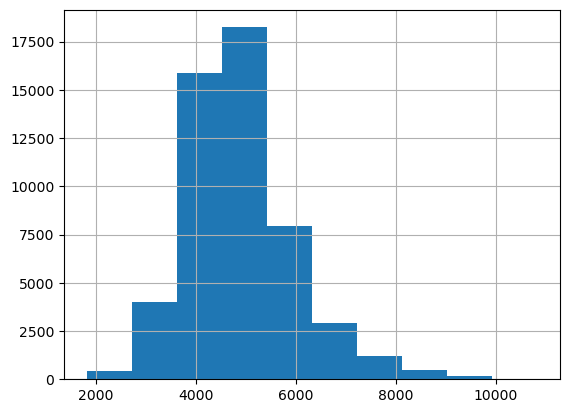

In [39]:
hc['Admission_Deposit'].hist()

The amount of admission paid ranges between 2000 and 10000 with the median around 5000.

---

## Convert Type to Categorical

Categorical variables are coded as `object` if it is not specified.

In [40]:
hc.dtypes

Unnamed: 0                             int64
case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

You may choose to convert it to `category`. For example, let's convert the __Type of Admission__ column and see how many observations are in each category:

In [41]:
hc['Type of Admission'] = hc['Type of Admission'].astype('category')
hc['Type of Admission'].value_counts() 

Type of Admission
Trauma       24614
Emergency    18889
Urgent        7735
Name: count, dtype: int64

Now, let's convert it to categorical:

>__Task 1__
>
>- Identify the categories in the __Hospital_type_code__ column and determine how many are in each category
>- Convert the column to `category` and determine how many observations are in each category

In [43]:
hc['Hospital_type_code'].unique()
hc['Hospital_type_code'].value_counts()

Hospital_type_code
a    23032
b    11184
c     7368
e     3928
d     3294
f     1745
g      687
Name: count, dtype: int64

In [24]:
hc['Hospital_type_code'] = hc['Hospital_type_code'].astype('category')
hc['Hospital_type_code'].value_counts() 

Hospital_type_code
a    23032
b    11184
c     7368
e     3928
d     3294
f     1745
g      687
Name: count, dtype: int64

---

## Nominal Data Mapping

### Label Encoding

we use `LabelEncoder` from the scikit-learn library to assign a distinct integer to each category. For example, we can map the __Type of Admission__ column to numeric values:

In [44]:
hc['Type of Admission'].head()

0    Emergency
1    Emergency
2       Trauma
3       Urgent
4       Trauma
Name: Type of Admission, dtype: category
Categories (3, object): ['Emergency', 'Trauma', 'Urgent']

In [46]:
from sklearn.preprocessing import LabelEncoder

# Initiate the encoder
enc = LabelEncoder()

# Apply enc.fit_transform method
enc.fit_transform(hc['Type of Admission'])

array([0, 0, 1, ..., 0, 1, 1])

In [49]:
hc['Type of Admission'].dtypes

CategoricalDtype(categories=['Emergency', 'Trauma', 'Urgent'], ordered=False, categories_dtype=object)

To convert the numbers back to string categories, we use the `inverse_transform()` method:

In [50]:
# create a result vector that our ML analysis could yield
result = np.array([1,1,0,2,0,1])

# Transform back
enc.inverse_transform(result)

array(['Trauma', 'Trauma', 'Emergency', 'Urgent', 'Emergency', 'Trauma'],
      dtype=object)

>__Task 2__
>
>- Encode the __Department__ to numbers using `LabelEncoder`
>- Print the status corresponding to the label array `np.array([0,1,1,4,3,2])`, using `inverse_transform`

In [54]:
hc['Department'].value_counts()

Department
gynecology            40051
anesthesia             4858
radiotherapy           4589
TB & Chest disease     1554
surgery                 186
Name: count, dtype: int64

In [55]:
# Initiate the encoder
enc = LabelEncoder()

# Apply enc.fit_transform method
enc.fit_transform(hc['Department'])

# Create a result vector that our ML analysis could yield
result = np.array([1,1,0,2,3,1])

# Transform back
enc.inverse_transform(result)

array(['anesthesia', 'anesthesia', 'TB & Chest disease', 'gynecology',
       'radiotherapy', 'anesthesia'], dtype=object)

### One-Hot Encoding

`OneHotEncoder` works similarly as `LabelEncoder` with subtle differences about how to initiate and transform. Instead of `pd.Series` object, __it takes `pd.DataFrame` as input__. So, you need to pass `df[['varName']]`.

>__Task 3__
>
>Convert the __Type of Admission__ column to one-hot vectors using `OneHotEncoder`

In [56]:
hc[['Type of Admission']].head()

,Type of Admission
0,Emergency
1,Emergency
2,Trauma
3,Urgent
4,Trauma


In [65]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()


In [66]:

# Initiate the encoder

# array = ohe.fit_transform(hc[['Type of Admission']]) 
array = ohe.fit_transform(hc[['Type of Admission']]).toarray()

array

# ...

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

Similarly, we can also use the `inverse_transform()` method to revert the data.

>__Task 4__
>
<!-- >Decode the below vector back to categories using `inverse_transform` -->
>
>`np.array([[0,1,0], [0,1,0], [0,0,1], [1,0,0], [0,0,1]])`

In [70]:
# create a result vector that our ML analysis could yield
inver_example = np.array([[0,1,0], [0,1,0], [0,0,1], [1,0,0], [0,0,1]])

# Transform back
ohe.inverse_transform(inver_example)

array([['Trauma'],
       ['Trauma'],
       ['Urgent'],
       ['Emergency'],
       ['Urgent']], dtype=object)

### Dummy Variables

Alternatively, we can use Pandas `get_dummies` to convert categorical variables to one-hot vectors.

>__Task 5__
>
>Convert the __Department__ column to one-hot vectors using `get_dummies`

In [71]:
pd.get_dummies(hc["Department"], prefix= 'dummy')

,dummy_TB & Chest disease,dummy_anesthesia,dummy_gynecology,dummy_radiotherapy,dummy_surgery
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,True,False,False,False
4,False,False,True,False,False
...,...,...,...,...,...
51233,False,False,True,False,False
51234,False,False,True,False,False
51235,False,False,True,False,False
51236,False,False,True,False,False


---

## Ordinal Data Mapping

>__Task 6__
>
>Use a dictionary to convert ordinal variables to numbers in the __Severity of Illness__ column
>
>- Create a dictionary that maps "Extreme" to 2, "Moderate" to 1 and "Minor" to 0
>- Map the categories to numeric labels using `replace(dict)`

In [73]:
hc['Severity of Illness'].unique()

array(['Minor', 'Extreme', 'Moderate'], dtype=object)

In [74]:
mapDict = {'Minor' : 0, 'Extreme': 2, 'Moderate': 1}

In [76]:
hc['Severity of Illness'] = hc['Severity of Illness'].replace(mapDict)
hc['Severity of Illness'] 

0        0
1        2
2        1
3        2
4        1
        ..
51233    0
51234    1
51235    1
51236    0
51237    2
Name: Severity of Illness, Length: 51238, dtype: int64

Now, let's assume we want to construct the original data back from the numeric variables.

>__Task 7__
>
>- Reverse the map dictionary using a `for` loop
>- Apply the same procedure using this reverse map

In [85]:
# Reversed map dictionary
mapDict_inv = {v: k for k, v in mapDict.items()}

In [86]:
hc['Severity of Illness'] = hc['Severity of Illness'].replace(mapDict_inv)
hc['Severity of Illness'] 

0           Minor
1         Extreme
2        Moderate
3         Extreme
4        Moderate
           ...   
51233       Minor
51234    Moderate
51235    Moderate
51236       Minor
51237     Extreme
Name: Severity of Illness, Length: 51238, dtype: object

In [31]:
...

An alternative is to use the `map()` method:

In [87]:
hc["Severity of Illness"].map(mapDict_inv)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
51233    NaN
51234    NaN
51235    NaN
51236    NaN
51237    NaN
Name: Severity of Illness, Length: 51238, dtype: object

---

## Convert Numeric to Categorical

Sometimes, we have numeric variables that would be more meaningful if they were put into categories using some thresholds. For example, the __Admission_Deposit__ column is a continuous numeric variable for the amount paid to the hospital.

<Axes: >

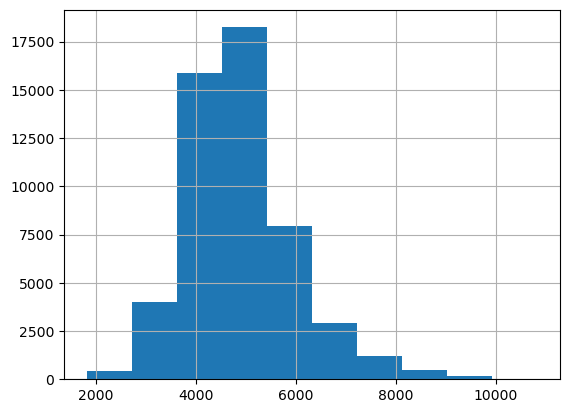

In [88]:
hc['Admission_Deposit'].hist()

We will now create three categories:
- 0 to 3000: low, 
- 3001 to 7000: moderate
- 7001 and above (maximum value) : expensive

To this end, we will 

1. Create a list of the thresholds or `buckets`
    - Find the maximum value using `max()`
2. Convert to a categorical variable using `pd.cut()`
2. Convert the categorical variable to one-hot vectors using `pd.get_dummies()`

In [89]:
maxVal  = hc['Admission_Deposit'].max()
buckets = [0,3000,7000,maxVal]

hc['Admission_Deposit_categ'] = pd.cut(hc['Admission_Deposit'],buckets)
hc['Admission_Deposit_categ']

0        (3000.0, 7000.0]
1        (3000.0, 7000.0]
2        (3000.0, 7000.0]
3        (3000.0, 7000.0]
4        (3000.0, 7000.0]
               ...       
51233    (3000.0, 7000.0]
51234    (3000.0, 7000.0]
51235    (3000.0, 7000.0]
51236    (3000.0, 7000.0]
51237    (3000.0, 7000.0]
Name: Admission_Deposit_categ, Length: 51238, dtype: category
Categories (3, interval[float64, right]): [(0.0, 3000.0] < (3000.0, 7000.0] < (7000.0, 10842.0]]

In [90]:
pd.get_dummies(hc['Admission_Deposit_categ'])

,"(0.0, 3000.0]","(3000.0, 7000.0]","(7000.0, 10842.0]"
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
51233,False,True,False
51234,False,True,False
51235,False,True,False
51236,False,True,False
